*NAME:R.MOHANA SHRI
ROLL NO:241801167*

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path='/content/drive/MyDrive/MACHINE LEARNING/ObesityDataSet.csv'
df = pd.read_csv(file_path)


In [7]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [8]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [9]:
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)


In [11]:
kernels = {
    'rbf': {'C': 1.0, 'gamma': 'scale'},
    'linear': {'C': 1.0},
    'poly': {'degree': 3, 'C': 1.0, 'gamma': 'scale'},
    'sigmoid': {'C': 1.0, 'gamma': 'scale'}
}

In [21]:
def train_evaluate_svm(kernel, params, X_train, X_test, y_train, y_test):
    print(f"\nTraining SVM with kernel = '{kernel}'")
    model = SVC(kernel=kernel, **params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=None, zero_division=0)

    print(f"Accuracy: {acc:.4f}")
    for i, label in enumerate(le_target.classes_):
        print(f"Class '{label}': Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-score={f1[i]:.4f}")

    return model, acc, precision.mean(), recall.mean(), f1.mean()

results = {}



In [22]:
for kernel, params in kernels.items():
    model, acc, prec, rec, f1 = train_evaluate_svm(kernel, params, X_train, X_test, y_train, y_test)
    results[kernel] = {'model': model, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}




Training SVM with kernel = 'rbf'
Confusion Matrix:
 [[68 14  0  0  0  0  0]
 [24 41  0  0  0 19  2]
 [ 0  0 37  3 17  1 48]
 [ 0  0 11 41 37  0  0]
 [ 0  0  4  0 93  0  0]
 [ 2 16  4  0  0 54 11]
 [ 0  3 19  0  0 18 47]]
Accuracy: 0.6009
Class 'Insufficient_Weight': Precision=0.7234, Recall=0.8293, F1-score=0.7727
Class 'Normal_Weight': Precision=0.5541, Recall=0.4767, F1-score=0.5125
Class 'Obesity_Type_I': Precision=0.4933, Recall=0.3491, F1-score=0.4088
Class 'Obesity_Type_II': Precision=0.9318, Recall=0.4607, F1-score=0.6165
Class 'Obesity_Type_III': Precision=0.6327, Recall=0.9588, F1-score=0.7623
Class 'Overweight_Level_I': Precision=0.5870, Recall=0.6207, F1-score=0.6034
Class 'Overweight_Level_II': Precision=0.4352, Recall=0.5402, F1-score=0.4821

Training SVM with kernel = 'linear'
Confusion Matrix:
 [[76  6  0  0  0  0  0]
 [11 59  0  0  0 15  1]
 [ 0  0 92  5  0  2  7]
 [ 0  0  3 86  0  0  0]
 [ 0  0  0  1 96  0  0]
 [ 0 12  1  0  0 67  7]
 [ 0  1 12  0  0 17 57]]
Accuracy:

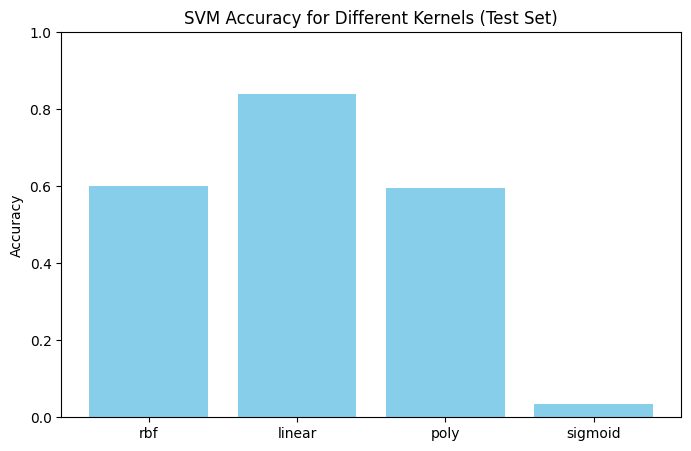

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v['accuracy'] for v in results.values()], color='skyblue')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels (Test Set)')
plt.ylim(0, 1)
plt.show()



In [24]:
cv_results = {'kernel': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [41]:
cv_results = {'kernel': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
for kernel, params in kernels.items():
    svm = SVC(kernel=kernel, **params, random_state=42)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_encoded, y_encoded, cv=skf, scoring=scoring)

    cv_results['kernel'].append(kernel)
    cv_results['accuracy'].append(np.mean(scores['test_accuracy']))
    cv_results['precision'].append(np.mean(scores['test_precision_macro']))
    cv_results['recall'].append(np.mean(scores['test_recall_macro']))
    cv_results['f1'].append(np.mean(scores['test_f1_macro']))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [42]:
cv_df = pd.DataFrame(cv_results)

In [34]:
cv_df = pd.DataFrame(cv_results)
print("\nCross-validation results:")
print(cv_df)



Cross-validation results:
    kernel  accuracy  precision    recall        f1
0  sigmoid  0.039321   0.121320  0.037008  0.016799
1      rbf  0.605868   0.611382  0.609128  0.595704
2   linear  0.881099   0.883006  0.878050  0.876302
3     poly  0.600660   0.606669  0.601402  0.589289
4  sigmoid  0.039321   0.121320  0.037008  0.016799


In [43]:
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(kernels))


<Figure size 1000x600 with 0 Axes>

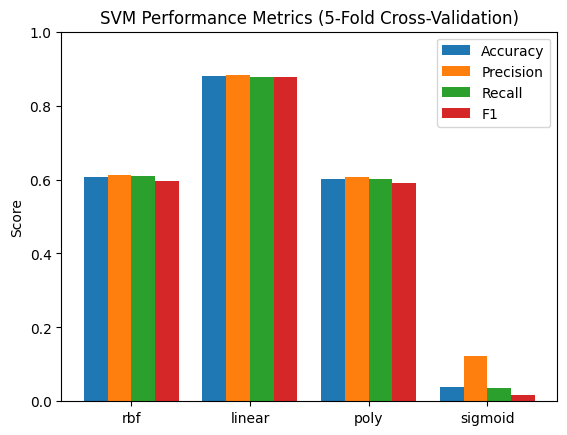

In [44]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, cv_df[metric], width=bar_width, label=metric.capitalize())

plt.xticks(x + bar_width * 1.5, cv_df['kernel'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('SVM Performance Metrics (5-Fold Cross-Validation)')
plt.legend()
plt.show()




In [45]:
rbf_model = results['rbf']['model']
print("\nFirst 5 Support Vectors (RBF kernel):")
print(rbf_model.support_vectors_[:5])



First 5 Support Vectors (RBF kernel):
[[ 0.   22.    1.67 50.    1.    1.    3.    3.    1.    0.    3.    0.
   1.    1.    3.    3.  ]
 [ 0.   19.    1.71 50.    0.    1.    1.    4.    1.    0.    1.    0.
   2.    1.    2.    3.  ]
 [ 1.   19.    1.7  50.    0.    1.    1.    4.    1.    0.    1.    0.
   2.    1.    2.    3.  ]
 [ 0.   20.    1.68 49.    0.    0.    3.    3.    2.    0.    2.    0.
   2.    1.    2.    3.  ]
 [ 1.   17.    1.71 52.    0.    1.    2.    2.    2.    0.    2.    0.
   0.    1.    2.    3.  ]]
